# Introduction

In [499]:
import numpy as ny
import pandas as pd

data = pd.read_csv('2018-personality-data.csv')
print(data.shape)
#print(rating.shape)

(1834, 34)


In [500]:
# Check for missing values
data.isna().sum()
# No missing value! Good News!

userid                  0
 openness               0
 agreeableness          0
 emotional_stability    0
 conscientiousness      0
 extraversion           0
 assigned metric        0
 assigned condition     0
 movie_1                0
 predicted_rating_1     0
 movie_2                0
 predicted_rating_2     0
 movie_3                0
 predicted_rating_3     0
 movie_4                0
 predicted_rating_4     0
 movie_5                0
 predicted_rating_5     0
 movie_6                0
 predicted_rating_6     0
 movie_7                0
 predicted_rating_7     0
 movie_8                0
 predicted_rating_8     0
 movie_9                0
 predicted_rating_9     0
 movie_10               0
 predicted_rating_10    0
 movie_11               0
 predicted_rating_11    0
 movie_12               0
 predicted_rating_12    0
 is_personalized        0
 enjoy_watching         0
dtype: int64

In [527]:
data.columns

Index([' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion', ' assigned metric',
       ' assigned condition', ' is_personalized', ' enjoy_watching '],
      dtype='object')

In [503]:
#drop the features which cannot be used as the predictors to classify the "enjoy_watching".
#since we cannot use the predicted_rating to predict another column.
data = data.drop(columns = [' movie_1', ' predicted_rating_1', ' movie_2', ' predicted_rating_2', ' movie_3',
                            ' predicted_rating_3', ' movie_4', ' predicted_rating_4', ' movie_5',
                            ' predicted_rating_5', ' movie_6', ' predicted_rating_6', ' movie_7',
                            ' predicted_rating_7', ' movie_8', ' predicted_rating_8', ' movie_9',
                            ' predicted_rating_9', ' movie_10', ' predicted_rating_10', ' movie_11',
                            ' predicted_rating_11', ' movie_12', ' predicted_rating_12','userid'])

In [504]:
#remove the space before and after the meaningful names
data_new = data.rename(columns={' openness' : 'openness',
                            ' agreeableness' : 'agreeableness',
                            ' emotional_stability' : 'emotional_stability',
                            ' conscientiousness' : 'conscientiousness',
                            ' extraversion' : 'extraversion',
                            ' assigned metric' : 'assigned metric',
                            ' assigned condition' : 'assigned condition',
                            ' is_personalized' : 'is_personalized',
                            ' enjoy_watching ' : 'enjoy_watching'})

In [505]:
data_new.columns

Index(['openness', 'agreeableness', 'emotional_stability', 'conscientiousness',
       'extraversion', 'assigned metric', 'assigned condition',
       'is_personalized', 'enjoy_watching'],
      dtype='object')

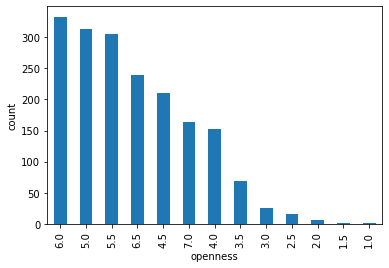

None
6.0    333
5.0    313
5.5    305
6.5    239
4.5    210
7.0    163
4.0    152
3.5     69
3.0     25
2.5     16
2.0      6
1.5      2
1.0      1
Name: openness, dtype: int64


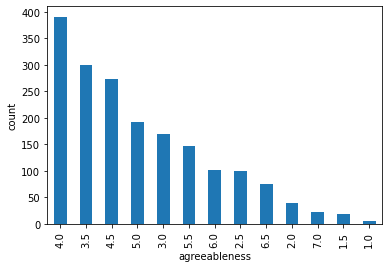

None
4.0    391
3.5    299
4.5    273
5.0    193
3.0    170
5.5    146
6.0    101
2.5    100
6.5     76
2.0     39
7.0     22
1.5     18
1.0      6
Name: agreeableness, dtype: int64


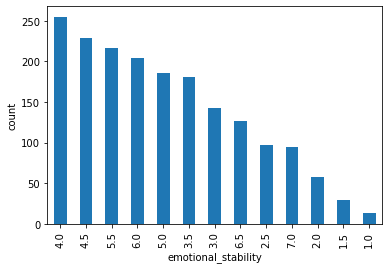

None
4.0    255
4.5    229
5.5    217
6.0    204
5.0    186
3.5    181
3.0    143
6.5    127
2.5     97
7.0     95
2.0     58
1.5     29
1.0     13
Name: emotional_stability, dtype: int64


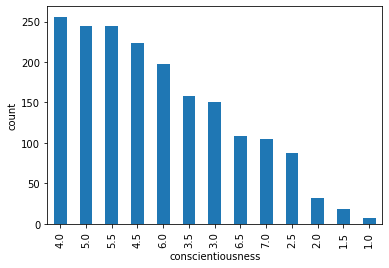

None
4.0    256
5.0    245
5.5    245
4.5    224
6.0    197
3.5    158
3.0    150
6.5    109
7.0    105
2.5     88
2.0     32
1.5     18
1.0      7
Name: conscientiousness, dtype: int64


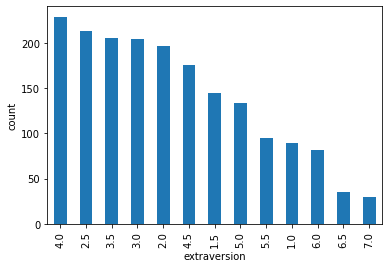

None
4.0    229
2.5    213
3.5    205
3.0    204
2.0    197
4.5    176
1.5    145
5.0    134
5.5     95
1.0     89
6.0     82
6.5     35
7.0     30
Name: extraversion, dtype: int64


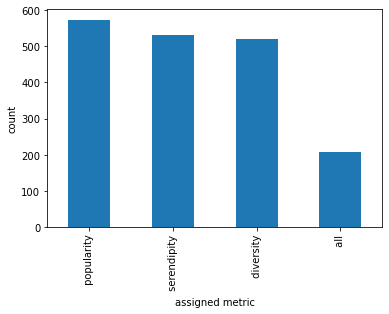

None
 popularity     574
 serendipity    532
 diversity      520
 all            208
Name: assigned metric, dtype: int64


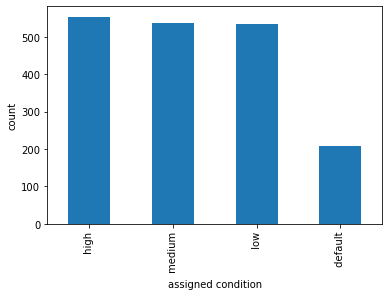

None
 high       554
 medium     538
 low        534
 default    208
Name: assigned condition, dtype: int64


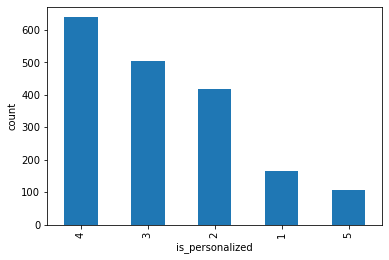

None
4    639
3    506
2    419
1    164
5    106
Name: is_personalized, dtype: int64


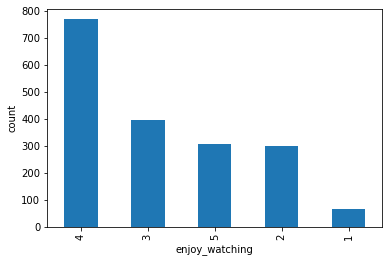

None
4    769
3    396
5    305
2    299
1     65
Name: enjoy_watching, dtype: int64


In [506]:
#Implement value_counts for all categorical variables (all variables are categorical)
#make bar plots for all variables
import matplotlib
import sklearn as sk
from matplotlib import pylab as plt

a = list(range(0,len(data_new.columns)))
for i in a:
        pd.value_counts(data_new.iloc[:,i]).plot.bar()
        plt.xlabel(data_new.columns[i])
        plt.ylabel('count')
        print(plt.show())
        print(pd.value_counts(data_new.iloc[:,i]))

In [501]:
# combine two columns based on the data description
#data = data.drop(columns = [' assigned metric', ' assigned condition'])

enjoy_watching   Enjoyable  Not Enjoyable
is_personalized                          
1                 0.140244       0.859756
2                 0.248210       0.751790
3                 0.573123       0.426877
4                 0.871674       0.128326
5                 0.943396       0.056604


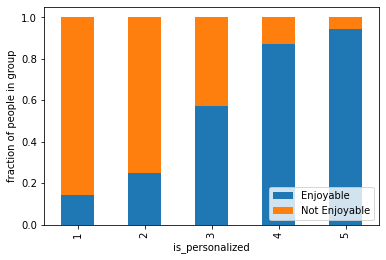

In [526]:
count_matrix = data_new.groupby(['is_personalized', 'enjoy_watching']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

enjoy_watching  Enjoyable  Not Enjoyable
agreeableness                           
1.0              0.333333       0.666667
1.5              0.555556       0.444444
2.0              0.641026       0.358974
2.5              0.550000       0.450000
3.0              0.570588       0.429412
3.5              0.575251       0.424749
4.0              0.562660       0.437340
4.5              0.604396       0.395604
5.0              0.590674       0.409326
5.5              0.589041       0.410959
6.0              0.643564       0.356436
6.5              0.618421       0.381579
7.0              0.727273       0.272727


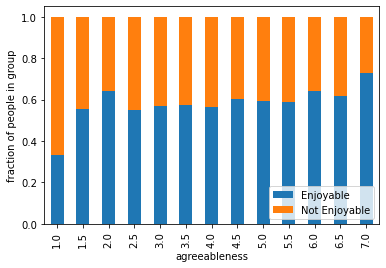

In [525]:
count_matrix = data_new.groupby(['agreeableness', 'enjoy_watching']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

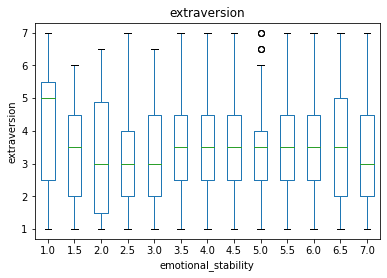

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt
data_new[['emotional_stability','extraversion']].boxplot(by='emotional_stability',grid=False)
plt.ylabel('extraversion')
plt.xlabel('emotional_stability')
plt.suptitle('')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1258767f0>,
      dtype=object)

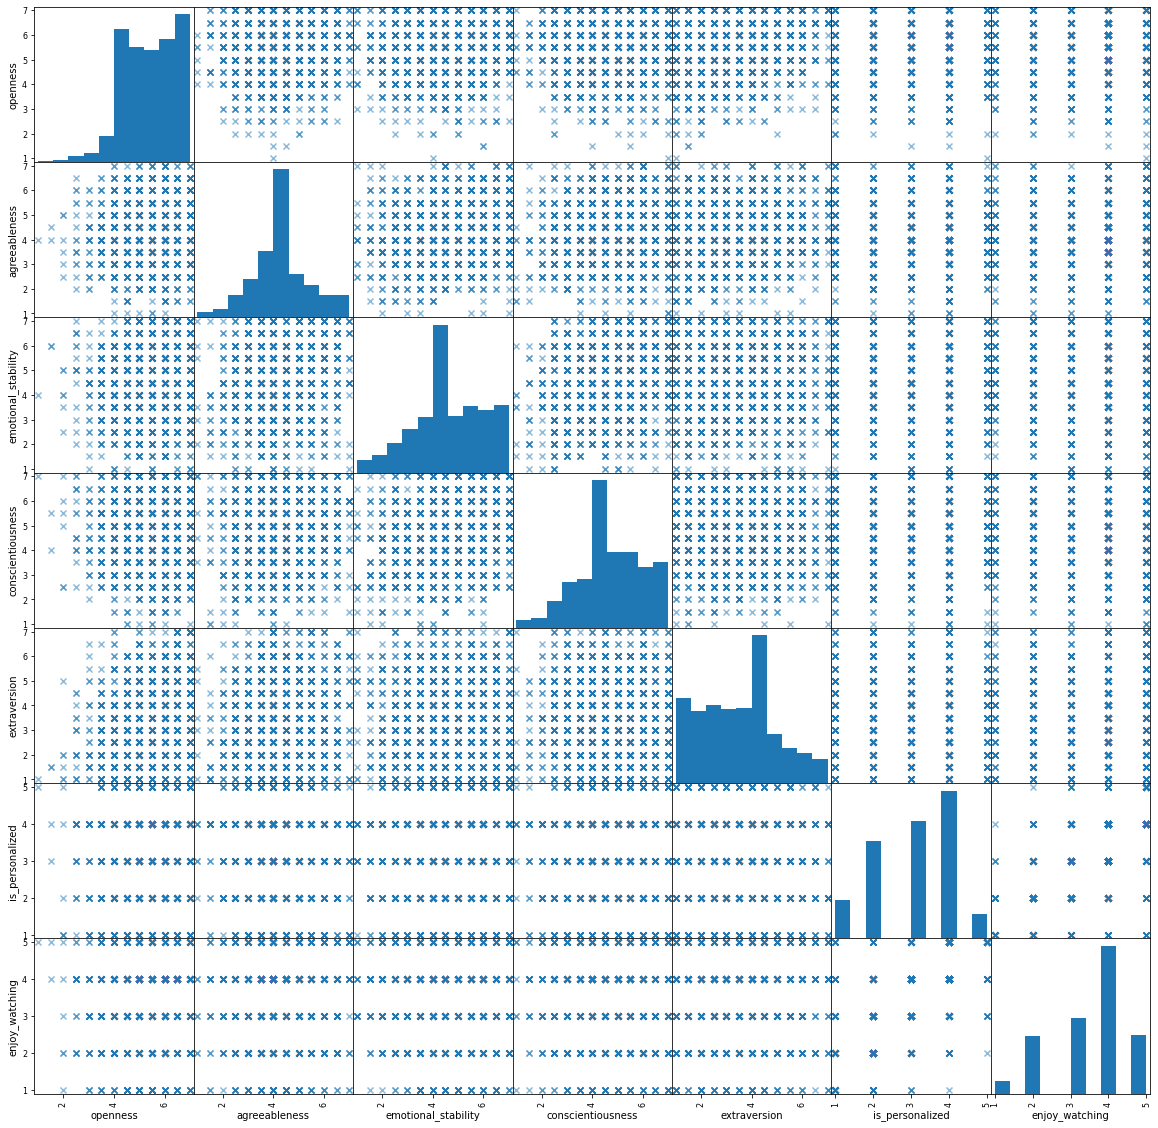

In [510]:
# All variables are categorical variables so that the scatter matrix is not interesting
from pandas.plotting import scatter_matrix
# make a scatter plot
scatter_matrix(data_new,figsize=[20,20],marker='x')

In [511]:
# It is reasonable to separate the "enjoy_watching" to be enjoyable/not enjoyable based on score 4
for i in list(range(0,len(data_new))):
    if data_new['enjoy_watching'][i] >= 4:
         data_new['enjoy_watching'][i] = 'Enjoyable'
    else:
        data_new['enjoy_watching'][i] = 'Not Enjoyable'

<ipython-input-511-28106a0ec605>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 'Enjoyable'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-511-28106a0ec605>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 'Not Enjoyable'


In [512]:
data_new.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,Enjoyable
1,7.0,4.0,6.0,5.5,4.0,all,default,2,Not Enjoyable
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,Not Enjoyable
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,Not Enjoyable
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,Not Enjoyable


In [513]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder
# Preprocess 
ordinal_ftrs = ['openness','agreeableness','emotional_stability','conscientiousness',
                'extraversion','is_personalized','assigned condition'] #Ranked categorical
ordinal_cats = [[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1,2,3,4,5],
               [' default', ' low', ' medium', ' high']]

lab = LabelEncoder()
onehot_ftrs = ['assigned metric'] #
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
                                              ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])


In [524]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = data_new.loc[:, data_new.columns != 'enjoy_watching']
y = data_new['enjoy_watching']


random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))
    
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    y_train_prep = le.fit_transform(y_train)
    y_val_prep = le.transform(y_val)
    y_test_prep = le.transform(y_test)
    

#    print(X_train_prep, y_train_prep) 
#    print('   validation set:',X_val_prep, y_val_prep) 
#    print('   test set:',X_test_prep, y_test_prep)
print(X_train.head())
print(X_train_prep[1:5])

train balance:
Enjoyable        0.578858
Not Enjoyable    0.421142
Name: enjoy_watching, dtype: float64
val balance:
Enjoyable        0.578231
Not Enjoyable    0.421769
Name: enjoy_watching, dtype: float64
train balance:
Enjoyable        0.578858
Not Enjoyable    0.421142
Name: enjoy_watching, dtype: float64
val balance:
Enjoyable        0.578231
Not Enjoyable    0.421769
Name: enjoy_watching, dtype: float64
train balance:
Enjoyable        0.578365
Not Enjoyable    0.421635
Name: enjoy_watching, dtype: float64
val balance:
Enjoyable        0.580205
Not Enjoyable    0.419795
Name: enjoy_watching, dtype: float64
train balance:
Enjoyable        0.578365
Not Enjoyable    0.421635
Name: enjoy_watching, dtype: float64
val balance:
Enjoyable        0.580205
Not Enjoyable    0.419795
Name: enjoy_watching, dtype: float64
train balance:
Enjoyable        0.579216
Not Enjoyable    0.420784
Name: enjoy_watching, dtype: float64
val balance:
Enjoyable        0.576792
Not Enjoyable    0.423208
Name: e